### load data

In [223]:
import pandas as pd
df= pd.read_csv('../src/data/dataset.csv')
df.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN
3,Krankenhaus-Dienstleistung-Problem,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Zurück zur E-Mail-Beschwerde über den Sperrver...,Incident,Customer Service,high,de,Security,Breach,Login,Maintenance,Incident,Resolution,Feedback,NaN
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN


In [224]:
df.shape

(20000, 15)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   18539 non-null  object
 1   body      19998 non-null  object
 2   answer    19996 non-null  object
 3   type      20000 non-null  object
 4   queue     20000 non-null  object
 5   priority  20000 non-null  object
 6   language  20000 non-null  object
 7   tag_1     20000 non-null  object
 8   tag_2     19954 non-null  object
 9   tag_3     19905 non-null  object
 10  tag_4     18461 non-null  object
 11  tag_5     13091 non-null  object
 12  tag_6     7351 non-null   object
 13  tag_7     3928 non-null   object
 14  tag_8     1907 non-null   object
dtypes: object(15)
memory usage: 2.3+ MB


In [226]:
df.duplicated().sum()

np.int64(0)

In [227]:
df.isnull().sum()

subject      1461
body            2
answer          4
type            0
queue           0
priority        0
language        0
tag_1           0
tag_2          46
tag_3          95
tag_4        1539
tag_5        6909
tag_6       12649
tag_7       16072
tag_8       18093
dtype: int64

In [228]:
df.isna().all(axis=1).sum()

np.int64(0)

### distribution des types de tickets (target)

In [229]:
df.groupby(['type'])['type'].count()

type
Change      2075
Incident    7978
Problem     4184
Request     5763
Name: type, dtype: int64

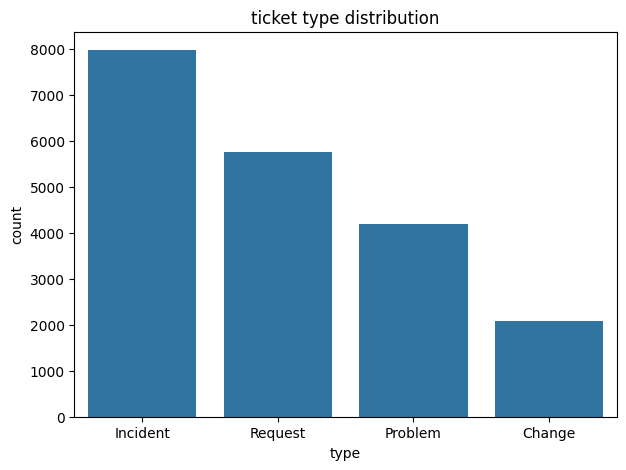

In [230]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.countplot(x='type',data=df)
plt.title('ticket type distribution')
plt.show()

### retirer longueur des emails
car Si le body texte  est trop long (plus de 300-400 mots environ), le modèle d'embeding "coupera" la fin du texte.

In [231]:
all_lengths=[]
for i in df['body']:
    all_lengths.append(len(str(i)))
print(all_lengths)

[252, 225, 696, 221, 675, 284, 115, 304, 557, 194, 600, 860, 640, 484, 38, 468, 278, 142, 25, 803, 508, 450, 137, 146, 204, 187, 554, 935, 668, 580, 350, 206, 1039, 692, 248, 247, 388, 107, 118, 394, 86, 639, 371, 486, 385, 530, 319, 175, 406, 373, 189, 233, 268, 491, 615, 220, 323, 697, 533, 207, 110, 440, 417, 153, 867, 211, 465, 384, 65, 615, 103, 99, 365, 511, 351, 367, 308, 345, 739, 216, 461, 993, 712, 100, 172, 910, 329, 575, 539, 346, 184, 585, 242, 367, 619, 398, 425, 53, 378, 735, 770, 563, 172, 341, 77, 497, 518, 372, 428, 488, 257, 48, 97, 519, 541, 491, 133, 642, 382, 372, 627, 601, 471, 100, 1185, 518, 1072, 99, 530, 807, 100, 584, 243, 122, 126, 579, 429, 531, 95, 358, 267, 699, 559, 576, 562, 78, 564, 276, 156, 223, 203, 191, 74, 523, 260, 691, 679, 59, 325, 508, 362, 726, 730, 472, 586, 738, 145, 208, 105, 562, 473, 249, 578, 171, 681, 114, 733, 524, 311, 172, 298, 674, 548, 63, 192, 382, 153, 290, 1255, 297, 93, 178, 314, 156, 622, 381, 353, 528, 254, 168, 499, 120, 2

### Fusion des champs texte (subject + body)

In [232]:
df['fusion_email']= df['subject'].fillna('')+ df['body'].fillna('')
df.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,fusion_email
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN,Unvorhergesehener Absturz der Datenanalyse-Pla...
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN,Customer Support InquirySeeking information on...
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN,Data Analytics for InvestmentI am contacting y...
3,Krankenhaus-Dienstleistung-Problem,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Zurück zur E-Mail-Beschwerde über den Sperrver...,Incident,Customer Service,high,de,Security,Breach,Login,Maintenance,Incident,Resolution,Feedback,NaN,Krankenhaus-Dienstleistung-ProblemEin Medien-D...
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN,"SecurityDear Customer Support, I am reaching o..."


In [233]:
df.isna().sum()

subject          1461
body                2
answer              4
type                0
queue               0
priority            0
language            0
tag_1               0
tag_2              46
tag_3              95
tag_4            1539
tag_5            6909
tag_6           12649
tag_7           16072
tag_8           18093
fusion_email        0
dtype: int64

## Netwayage NLP

### 1. Normalisation (lowercase)

In [234]:
features = df.columns
for feature in features:
    df[feature]= df[feature].str.lower()
df.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,fusion_email
0,unvorhergesehener absturz der datenanalyse-pla...,die datenanalyse-plattform brach unerwartet ab...,ich werde ihnen bei der lösung des problems he...,incident,general inquiry,low,de,crash,technical,bug,hardware,resolution,outage,documentation,NaN,unvorhergesehener absturz der datenanalyse-pla...
1,customer support inquiry,seeking information on digital strategies that...,we offer a variety of digital strategies and s...,request,customer service,medium,en,feedback,sales,it,tech support,NaN,NaN,NaN,NaN,customer support inquiryseeking information on...
2,data analytics for investment,i am contacting you to request information on ...,i am here to assist you with data analytics to...,request,customer service,medium,en,technical,product,guidance,documentation,performance,feature,NaN,NaN,data analytics for investmenti am contacting y...
3,krankenhaus-dienstleistung-problem,ein medien-daten-sperrverhalten trat aufgrund ...,zurück zur e-mail-beschwerde über den sperrver...,incident,customer service,high,de,security,breach,login,maintenance,incident,resolution,feedback,NaN,krankenhaus-dienstleistung-problemein medien-d...
4,security,"dear customer support, i am reaching out to in...","dear [name], we take the security of medical d...",request,customer service,medium,en,security,customer,compliance,breach,documentation,guidance,NaN,NaN,"securitydear customer support, i am reaching o..."


###  2. Tokenization & detele ponctuations

In [235]:
from nltk.tokenize import RegexpTokenizer
tokenizer= RegexpTokenizer(r'\w+')
for feature in features:
    df[feature]= df[feature].apply(lambda x: tokenizer.tokenize(str(x)))

df.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,fusion_email
0,"[unvorhergesehener, absturz, der, datenanalyse...","[die, datenanalyse, plattform, brach, unerwart...","[ich, werde, ihnen, bei, der, lösung, des, pro...",[incident],"[general, inquiry]",[low],[de],[crash],[technical],[bug],[hardware],[resolution],[outage],[documentation],[nan],"[unvorhergesehener, absturz, der, datenanalyse..."
1,"[customer, support, inquiry]","[seeking, information, on, digital, strategies...","[we, offer, a, variety, of, digital, strategie...",[request],"[customer, service]",[medium],[en],[feedback],[sales],[it],"[tech, support]",[nan],[nan],[nan],[nan],"[customer, support, inquiryseeking, informatio..."
2,"[data, analytics, for, investment]","[i, am, contacting, you, to, request, informat...","[i, am, here, to, assist, you, with, data, ana...",[request],"[customer, service]",[medium],[en],[technical],[product],[guidance],[documentation],[performance],[feature],[nan],[nan],"[data, analytics, for, investmenti, am, contac..."
3,"[krankenhaus, dienstleistung, problem]","[ein, medien, daten, sperrverhalten, trat, auf...","[zurück, zur, e, mail, beschwerde, über, den, ...",[incident],"[customer, service]",[high],[de],[security],[breach],[login],[maintenance],[incident],[resolution],[feedback],[nan],"[krankenhaus, dienstleistung, problemein, medi..."
4,[security],"[dear, customer, support, i, am, reaching, out...","[dear, name, we, take, the, security, of, medi...",[request],"[customer, service]",[medium],[en],[security],[customer],[compliance],[breach],[documentation],[guidance],[nan],[nan],"[securitydear, customer, support, i, am, reach..."


### 3. suppression des stopwords

**we have different language so first let's see the different languages that we have**

In [236]:
df['language'].value_counts()

language
[en]    11923
[de]     8077
Name: count, dtype: int64

In [237]:
# filtered_df_de= df[df['language'].str[0]== 'de']
# for feature in filtered_df_de.columns:
#     filtered_df_de[feature]= filtered_df_de[feature].apply(lambda x:[ word for word in x if word not in stopwords_de])
#     df[feature]= filtered_df_de[feature]
# filtered_df_de.head()

**implement stopwords for each language**

In [238]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stopwrords_en= stopwords.words('english')
stopwords_de= stopwords.words('german')

#filter df whene it is in en
filtered_df_en= df[df['language'].str[0]== 'en']
for feature in filtered_df_en.columns:
    filtered_df_en[feature]= filtered_df_en[feature].apply(lambda x:[word for word in x if word not in stopwrords_en])
df.update(filtered_df_en)

# #filter df whene it is in germany
filtered_df_de= df[df['language'].str[0]== 'de']
for feature in filtered_df_de.columns:
    filtered_df_de[feature]= filtered_df_de[feature].apply(lambda x:[ word for word in x if word not in stopwords_de])
df.update(filtered_df_de)


[nltk_data] Downloading package stopwords to /home/hp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_9627/3318247696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_en[feature]= filtered_df_en[feature].apply(lambda x:[word for word in x if word not in stopwrords_en])
/tmp/ipykernel_9627/3318247696.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_de[feature]= filtered_df_de[feature].apply(lambda x:[ word for word in x if word not in stopwor

In [239]:
df.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,fusion_email
0,"[unvorhergesehener, absturz, datenanalyse, pla...","[datenanalyse, plattform, brach, unerwartet, a...","[lösung, problems, helfen, datenanalyse, platt...",[incident],"[general, inquiry]",[low],[de],[crash],[technical],[bug],[hardware],[resolution],[outage],[documentation],[nan],"[unvorhergesehener, absturz, datenanalyse, pla..."
1,"[customer, support, inquiry]","[seeking, information, digital, strategies, ai...","[offer, variety, digital, strategies, services...",[request],"[customer, service]",[medium],[en],[feedback],[sales],[],"[tech, support]",[nan],[nan],[nan],[nan],"[customer, support, inquiryseeking, informatio..."
2,"[data, analytics, investment]","[contacting, request, information, data, analy...","[assist, data, analytics, tools, investment, o...",[request],"[customer, service]",[medium],[en],[technical],[product],[guidance],[documentation],[performance],[feature],[nan],[nan],"[data, analytics, investmenti, contacting, req..."
3,"[krankenhaus, dienstleistung, problem]","[medien, daten, sperrverhalten, trat, aufgrund...","[zurück, e, mail, beschwerde, sperrversuch, gr...",[incident],"[customer, service]",[high],[de],[security],[breach],[login],[maintenance],[incident],[resolution],[feedback],[nan],"[krankenhaus, dienstleistung, problemein, medi..."
4,[security],"[dear, customer, support, reaching, inquire, s...","[dear, name, take, security, medical, data, se...",[request],"[customer, service]",[medium],[en],[security],[customer],[compliance],[breach],[documentation],[guidance],[nan],[nan],"[securitydear, customer, support, reaching, in..."


### Handle tags

Fusionner tous les tags (Approche recommandée)
Puisque votre objectif est de traiter le contenu textuel, vous pouvez regrouper tous les tags existants en une seule entité textuelle.

Action : Créez une nouvelle colonne all_tags qui concatène les valeurs de tag_1 à tag_8 (en ignorant les valeurs vides).

Avantage : Cela simplifie l'entrée pour votre modèle d'embedding tout en conservant l'information sémantique contenue dans les tags, même s'ils sont peu nombreux pour certains tickets.

In [240]:
df['tags']= df['tag_1']+df['tag_2']+df['tag_3']+df['tag_4']+df['tag_5']+df['tag_5']+df['tag_6']+df['tag_7']+df['tag_8']
df.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,fusion_email,tags
0,"[unvorhergesehener, absturz, datenanalyse, pla...","[datenanalyse, plattform, brach, unerwartet, a...","[lösung, problems, helfen, datenanalyse, platt...",[incident],"[general, inquiry]",[low],[de],[crash],[technical],[bug],[hardware],[resolution],[outage],[documentation],[nan],"[unvorhergesehener, absturz, datenanalyse, pla...","[crash, technical, bug, hardware, resolution, ..."
1,"[customer, support, inquiry]","[seeking, information, digital, strategies, ai...","[offer, variety, digital, strategies, services...",[request],"[customer, service]",[medium],[en],[feedback],[sales],[],"[tech, support]",[nan],[nan],[nan],[nan],"[customer, support, inquiryseeking, informatio...","[feedback, sales, tech, support, nan, nan, nan..."
2,"[data, analytics, investment]","[contacting, request, information, data, analy...","[assist, data, analytics, tools, investment, o...",[request],"[customer, service]",[medium],[en],[technical],[product],[guidance],[documentation],[performance],[feature],[nan],[nan],"[data, analytics, investmenti, contacting, req...","[technical, product, guidance, documentation, ..."
3,"[krankenhaus, dienstleistung, problem]","[medien, daten, sperrverhalten, trat, aufgrund...","[zurück, e, mail, beschwerde, sperrversuch, gr...",[incident],"[customer, service]",[high],[de],[security],[breach],[login],[maintenance],[incident],[resolution],[feedback],[nan],"[krankenhaus, dienstleistung, problemein, medi...","[security, breach, login, maintenance, inciden..."
4,[security],"[dear, customer, support, reaching, inquire, s...","[dear, name, take, security, medical, data, se...",[request],"[customer, service]",[medium],[en],[security],[customer],[compliance],[breach],[documentation],[guidance],[nan],[nan],"[securitydear, customer, support, reaching, in...","[security, customer, compliance, breach, docum..."


In [241]:
df.drop(['subject', 'body','tag_1','tag_2','tag_3','tag_4','tag_5', 'tag_6', 'tag_7','tag_8'], axis=1, inplace=True)
df.head()

,answer,type,queue,priority,language,fusion_email,tags
0,"[lösung, problems, helfen, datenanalyse, platt...",[incident],"[general, inquiry]",[low],[de],"[unvorhergesehener, absturz, datenanalyse, pla...","[crash, technical, bug, hardware, resolution, ..."
1,"[offer, variety, digital, strategies, services...",[request],"[customer, service]",[medium],[en],"[customer, support, inquiryseeking, informatio...","[feedback, sales, tech, support, nan, nan, nan..."
2,"[assist, data, analytics, tools, investment, o...",[request],"[customer, service]",[medium],[en],"[data, analytics, investmenti, contacting, req...","[technical, product, guidance, documentation, ..."
3,"[zurück, e, mail, beschwerde, sperrversuch, gr...",[incident],"[customer, service]",[high],[de],"[krankenhaus, dienstleistung, problemein, medi...","[security, breach, login, maintenance, inciden..."
4,"[dear, name, take, security, medical, data, se...",[request],"[customer, service]",[medium],[en],"[securitydear, customer, support, reaching, in...","[security, customer, compliance, breach, docum..."


## Encodage des colonnes queue  et language

In [249]:
df.isna().sum()

answer          0
type            0
queue           0
priority        0
language        0
fusion_email    0
tags            0
dtype: int64

In [263]:
from sklearn.preprocessing import OneHotEncoder

columns = ['priority', 'queue']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
for col in columns:
        # Convert column to 2D and handle NaN
        df[col]= df[col].str[0]
        transformed = encoder.fit_transform(df[[col]])
        # Convert to DataFrame with proper column names
        transformed_df = pd.DataFrame(
            transformed,
            columns=encoder.get_feature_names_out([col]),
            index=df.index
        ) 
        # delete original column and add encoded columns
        df = pd.concat([df.drop(columns=[col]), transformed_df], axis=1)
df.head()

,answer,type,language,fusion_email,tags,priority_high,priority_low,priority_medium,queue_billing,queue_customer,queue_general,queue_human,queue_it,queue_product,queue_returns,queue_sales,queue_service,queue_support,queue_technical
0,"[lösung, problems, helfen, datenanalyse, platt...",[incident],[de],"[unvorhergesehener, absturz, datenanalyse, pla...","[crash, technical, bug, hardware, resolution, ...",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[offer, variety, digital, strategies, services...",[request],[en],"[customer, support, inquiryseeking, informatio...","[feedback, sales, tech, support, nan, nan, nan...",0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[assist, data, analytics, tools, investment, o...",[request],[en],"[data, analytics, investmenti, contacting, req...","[technical, product, guidance, documentation, ...",0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[zurück, e, mail, beschwerde, sperrversuch, gr...",[incident],[de],"[krankenhaus, dienstleistung, problemein, medi...","[security, breach, login, maintenance, inciden...",1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"[dear, name, take, security, medical, data, se...",[request],[en],"[securitydear, customer, support, reaching, in...","[security, customer, compliance, breach, docum...",0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Encode le target

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['type']= le.fit_transform(df['type'].str[0])


In [270]:
df.head(2)

,answer,type,language,fusion_email,tags,priority_high,priority_low,priority_medium,queue_billing,queue_customer,queue_general,queue_human,queue_it,queue_product,queue_returns,queue_sales,queue_service,queue_support,queue_technical
0,"[lösung, problems, helfen, datenanalyse, platt...",1,[de],"[unvorhergesehener, absturz, datenanalyse, pla...","[crash, technical, bug, hardware, resolution, ...",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[offer, variety, digital, strategies, services...",3,[en],"[customer, support, inquiryseeking, informatio...","[feedback, sales, tech, support, nan, nan, nan...",0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Embeding

/home/hp/simplon_projects/ticket-classification-mlops/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading weights: 100%|██████████| 103/103 [00:00<00:00, 260.32it/s, Materializing param=pooler.dense.weight]                             
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
